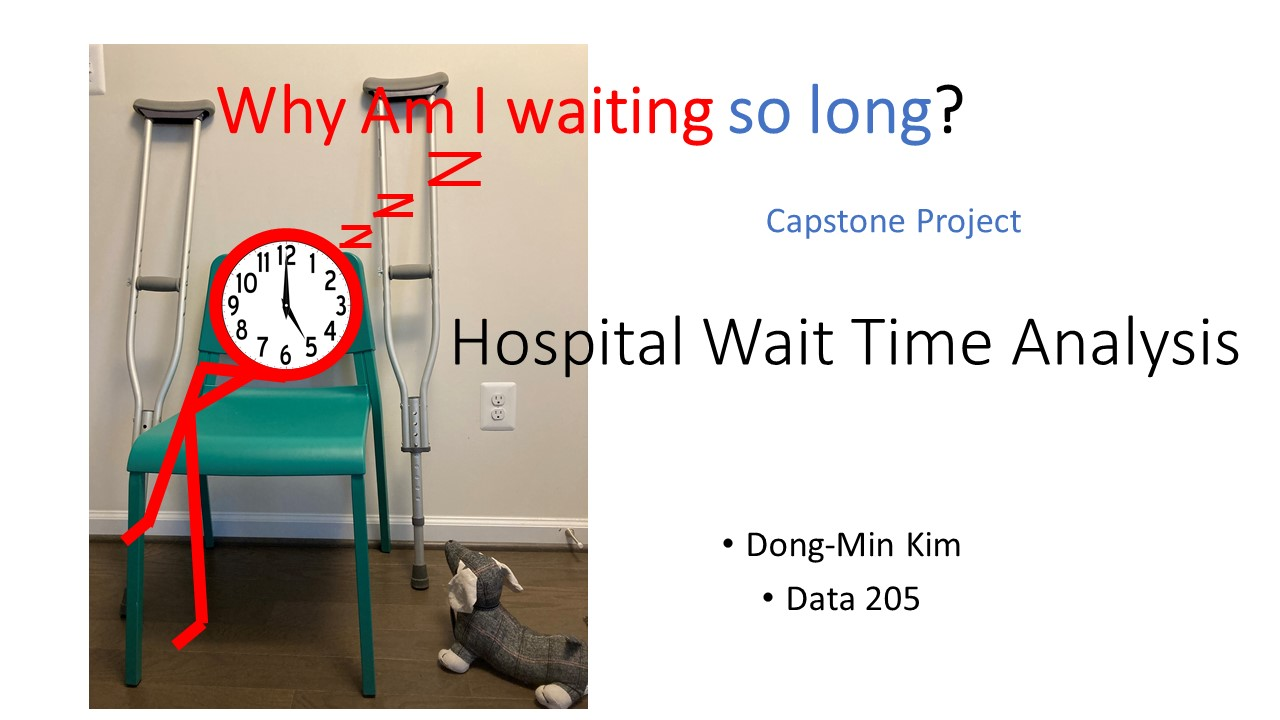

# Problem Statement
### Patients’ complaints make the healthcare system employers concern:
### - The patient might leave a hospital. 
### - Impact the quality of hospital.
### - Impact the negative reputation of doctors, nursing, etc.
### - Cause the finance crisis. 

# Introduction
## What is the reason to use the wait time in the healthcare system?
### - Wait time affects patient to view the level of care they receive.
### - The length of waiting could be one of the measurement factors for the level of care.
### - The hospital wait time impacts on patient outcomes.

In [104]:
pip install RISE

Note: you may need to restart the kernel to use updated packages.


In [105]:
conda install -c conda-forge rise

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [106]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


# Hospital Information
### The dataset is imorted from Kaggle. The original dataset is the data medical and medicare system. 

### Agency for Healthcare Reserch and Quality: The AHRQ Quality Indicators (Qis) comprise four measure areas: inpatient, prevention, patient safety, and pediatric care.

##  Observations and Cleaning

In [108]:
# Import the python package for handling data frames.
import pandas as pd
import os
import numpy as np
import seaborn as sns # for plotting
import plotly.express as px 
import matplotlib.pyplot as plt
import plotly.subplots as sp

In [109]:
df = pd.read_csv (r'C:\Users\dkim174\Documents\Classes\Data205\Dataset\HospInfo.csv')

In [110]:
df.shape

(4812, 29)

In [111]:
print(df.columns)

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [112]:
# Test to see the types of hospitals in the dataset.

test = df.groupby('Hospital Type')['Provider ID'].count()
test

Hospital Type
Acute Care Hospitals         3369
Childrens                      99
Critical Access Hospitals    1344
Name: Provider ID, dtype: int64

In [113]:
pd.set_option('display.max_columns',None)
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,True,True,3,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,True,4,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,True,True,Not Available,There are too few measures or measure groups r...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,True,True,3,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [114]:
# Test to see if there are any duplicates.

test1= df.groupby('Hospital Name')['Provider ID'].count()
test1

Hospital Name
ABBEVILLE AREA MEDICAL CENTER                 1
ABBEVILLE GENERAL HOSPITAL                    1
ABBOTT NORTHWESTERN HOSPITAL                  1
ABILENE REGIONAL MEDICAL CENTER               1
ABINGTON MEMORIAL HOSPITAL                    1
                                             ..
YORK HOSPITAL                                 2
YUKON KUSKOKWIM DELTA REG HOSPITAL            1
YUMA DISTRICT HOSPITAL                        1
YUMA REGIONAL MEDICAL CENTER                  1
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER    1
Name: Provider ID, Length: 4623, dtype: int64

In [115]:
nrows = df.shape[0]

In [116]:
num_unique_hosp = df['Provider ID'].nunique()

In [117]:
print("Is Provider ID a unique identifier?: {0}".format(nrows == num_unique_hosp))

Is Provider ID a unique identifier?: True


In [118]:
# drop columns contains "footnote" which are not relevant to my data analysis and replace "Not available" to "NaN" as true missing value.
#init_notebook_mode(connected=True)

df=df.drop(['Address','ZIP Code','Phone Number','Patient experience national comparison footnote','Efficient use of medical imaging national comparison footnote',
'Hospital overall rating footnote','Mortality national comparison footnote','Mortality national comparison footnote',
'Safety of care national comparison footnote','Readmission national comparison footnote',
'Patient experience national comparison footnote','Effectiveness of care national comparison footnote',
'Timeliness of care national comparison footnote','Timeliness of care national comparison footnote',
'Efficient use of medical imaging national comparison footnote'],axis=1)

#Take care of warnings
import warnings
warnings.filterwarnings("ignore")

In [119]:
# Identify null values in the dataset.

df.isnull().sum()

Provider ID                                               0
Hospital Name                                             0
City                                                      0
State                                                     0
County Name                                              15
Hospital Type                                             0
Hospital Ownership                                        0
Emergency Services                                        0
Meets criteria for meaningful use of EHRs               144
Hospital overall rating                                   0
Mortality national comparison                             0
Safety of care national comparison                        0
Readmission national comparison                           0
Patient experience national comparison                    0
Effectiveness of care national comparison                 0
Timeliness of care national comparison                    0
Efficient use of medical imaging nationa

In [120]:
# Remove all the null values in the dataset.

df = df.dropna()
df.isnull().sum()

Provider ID                                             0
Hospital Name                                           0
City                                                    0
State                                                   0
County Name                                             0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Meets criteria for meaningful use of EHRs               0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness of care national comparison               0
Timeliness of care national comparison                  0
Efficient use of medical imaging national comparison    0
Location      

In [121]:
df.shape

(4654, 18)

In [122]:
df.describe()

,Provider ID
count,4654.000000
mean,266734.634293
std,154629.296582
min,10001.000000
25%,140192.500000
50%,260013.000000
75%,390179.750000
max,670114.000000


# Data Visualization

## Hospital Demographics
### The total number of hospitals in each state and different type of hospitals

In [123]:
total_state = pd.value_counts(df['State'])
total_state = pd.DataFrame(total_state)
total_state = total_state.reset_index()

In [124]:
total_state.columns = ['State','Number of Hospitals']

In [125]:
total_state = total_state.sort_values('Number of Hospitals',axis = 0,ascending = False )

In [126]:
print(total_state)

   State  Number of Hospitals
0     TX                  383
1     CA                  330
2     FL                  183
3     IL                  179
4     PA                  167
5     NY                  166
6     OH                  164
7     KS                  132
8     MN                  129
9     MI                  129
10    GA                  128
11    WI                  125
12    IN                  118
14    IA                  116
13    OK                  116
15    LA                  114
16    MO                  111
17    TN                  106
18    NC                  104
19    KY                   93
20    MS                   92
21    WA                   89
22    AL                   89
23    NE                   89
24    VA                   82
25    AZ                   77
26    CO                   76
27    AR                   72
28    NJ                   66
29    MA                   63
30    OR                   60
31    SC                   59
32    MT  

In [127]:
import plotly.express as px

In [128]:
fig = px.bar(total_state, x='Number of Hospitals',y='State',title ='Number of Hospitals')
fig.update_xaxes(tickangle=0)
fig.show()

### The different type of hospitals

In [129]:
hosp_type = pd.value_counts(df['Hospital Type'])
hosp_type = pd.DataFrame(hosp_type)
hosp_type = hosp_type.reset_index()

In [130]:
hosp_type.columns = ['Hospital Type','Number of Hospitals']

In [131]:
fig = px.bar(hosp_type, x="Number of Hospitals",y="Hospital Type",color="Hospital Type",orientation="h", hover_name="Hospital Type",
             color_discrete_sequence=["orange", "red", "green"],title="Explicit color sequence")
fig.update_xaxes(tickangle=0)
fig.show()

In [132]:
from plotly.subplots import make_subplots

In [133]:
# The total number of hospitals in each state & The different type of hospitals
fig = make_subplots(rows=1, cols=2)
bar1 = px.bar(total_state, x = "Number of Hospitals", y = "State", title ='Number of Hospitals')
bar2 = px.bar(hosp_type, x = "Number of Hospitals", y = "Hospital Type", color="Hospital Type",orientation="h", hover_name="Hospital Type",color_discrete_sequence=["orange", "red", "green"],title="Explicit color sequence")
for trace in bar1.data:fig.add_trace(trace, 1, 1)
for trace in bar2.data:fig.add_trace(trace, 1, 2)
fig.update_layout(barmode="stack")
fig.show()

### From the above barplot and table, we can see Texas, California, Illinois Pennsylvania and New York are the top 5 that has the maximum number of hospitals.  Delaware, District of Columbia and Rhode Island have very low number of hospitals. 
### From the above barplot, we can see that USA has Acute Care Hospitals in maximum number as compared to Critical Access and Children's Hospital.


### Ownership by different groups: Does the government own majority of the hospitals or are they owned by Private organizations?

In [134]:
hosp_owner = pd.value_counts(df['Hospital Ownership'])
hosp_owner = pd.DataFrame(hosp_owner)
hosp_owner = hosp_owner.reset_index()

In [135]:
hosp_owner.columns = ['Hospital Ownership','Number of Hospitals']

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

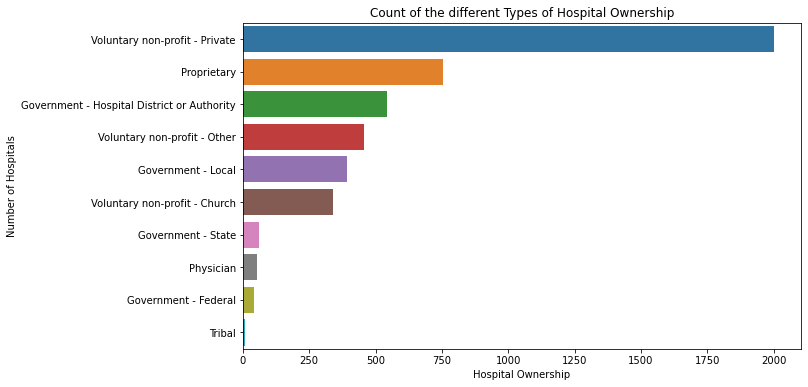

In [136]:
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x= 'Number of Hospitals', y = 'Hospital Ownership', data = hosp_owner)
ax.set_xlabel('Hospital Ownership')
ax.set_ylabel( 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

### More than a half of the hospitals in US is owned by voluntary non-profit organizations. The voluntary hospital is a private non-profit hospital that is operated under individual, partnership, or corporate control.

In [137]:
df[df['Hospital Ownership']=='Voluntary non-profit - Private']

,Provider ID,Hospital Name,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
5,11304,CHOCTAW GENERAL HOSPITAL,BUTLER,AL,CHOCTAW,Critical Access Hospitals,Voluntary non-profit - Private,True,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Same as the national average,Not Available,"401 VANITY FAIR LANE, PO BOX 618\nBUTLER, AL\n"
8,21309,KANAKANAK HOSPITAL,DILLINGHAM,AK,DILLINGHAM,Critical Access Hospitals,Voluntary non-profit - Private,True,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"P O BOX 130\nDILLINGHAM, AK\n"
18,40007,CHI-ST VINCENT INFIRMARY,LITTLE ROCK,AR,PULASKI,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,Below the national average,Below the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,"TWO ST VINCENT CIRCLE\nLITTLE ROCK, AR\n"
20,40050,OUACHITA COUNTY MEDICAL CENTER,CAMDEN,AR,OUACHITA,Acute Care Hospitals,Voluntary non-profit - Private,True,True,4,Same as the national average,Same as the national average,Above the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,"638 CALIFORNIA AVENUE\nCAMDEN, AR\n"
23,41328,CHICOT MEMORIAL MEDICAL CENTER,LAKE VILLAGE,AR,CHICOT,Critical Access Hospitals,Voluntary non-profit - Private,True,True,3,Same as the national average,Not Available,Same as the national average,Above the national average,Same as the national average,Same as the national average,Below the national average,"2729 SOUTH HIGHWAY 65 &amp; 82\nLAKE VILLAGE, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,520102,AURORA LAKELAND MEDICAL CENTER,ELKHORN,WI,WALWORTH,Acute Care Hospitals,Voluntary non-profit - Private,True,True,4,Same as the national average,Above the national average,Above the national average,Above the national average,Same as the national average,Above the national average,Same as the national average,"W3985 COUNTY ROAD NN\nELKHORN, WI\n(42.662615,..."
4806,490050,VIRGINIA HOSPITAL CENTER,ARLINGTON,VA,ARLINGTON,Acute Care Hospitals,Voluntary non-profit - Private,True,True,4,Same as the national average,Above the national average,Above the national average,Above the national average,Above the national average,Below the national average,Same as the national average,"1701 NORTH GEORGE MASON DRIVE\nARLINGTON, VA\n..."
4809,491302,CARILION GILES COMMUNITY HOSPITAL,PEARISBURG,VA,GILES,Critical Access Hospitals,Voluntary non-profit - Private,True,True,4,Same as the national average,Not Available,Same as the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -..."
4810,510012,PLEASANT VALLEY HOSPITAL,POINT PLEASANT,WV,MASON,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,Above the national average,Same as the national average,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868..."


In [138]:
# See where Tribal (operated by local indian health care centers) is located.
df[df['Hospital Ownership'] == 'Tribal'].count().sum()

162

In [139]:
df[df['Hospital Ownership'] == 'Tribal']

,Provider ID,Hospital Name,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
6,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,BETHEL,AK,BETHEL,Acute Care Hospitals,Tribal,True,True,3,Same as the national average,Not Available,Same as the national average,Below the national average,Not Available,Not Available,Not Available,"PO BOX 287\nBETHEL, AK\n"
7,21308,NORTON SOUND REGIONAL HOSPITAL,NOME,AK,NOME,Critical Access Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"1000 GREG KRUSCHEK AVENUE (P O BOX 966)\nNOME,..."
9,21310,MANIILAQ HEALTH CENTER,KOTZEBUE,AK,NORTHWEST ARCTIC,Critical Access Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"PO BOX 43\nKOTZEBUE, AK\n"
12,30074,SELLS HOSPITAL,SELLS,AZ,PIMA,Acute Care Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"HIGHWAY 86, AT TOPAWA ROAD\nSELLS, AZ\n"
15,31305,HOPI HEALTH CARE CENTER,POLACCA,AZ,NAVAJO,Critical Access Hospitals,Tribal,False,True,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,"HIGHWAY 264, MILEPOST 388\nPOLACCA, AZ\n"
3619,370057,MUSCOGEE (CREEK) NATION MEDICAL CENTER,OKMULGEE,OK,OKMULGEE,Acute Care Hospitals,Tribal,True,True,2,Same as the national average,Not Available,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Not Available,"1401 MORRIS DRIVE\nOKMULGEE, OK\n(35.610384, -..."
3712,370172,CHOCTAW NATION HEALTH SERVICES AUTHORITY,TALIHINA,OK,LATIMER,Acute Care Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Not Available,Above the national average,Same as the national average,Not Available,Not Available,"1 CHOCTAW WAY\nTALIHINA, OK\n(34.753721, -95.0..."
3733,371333,CREEK NATION COMMUNITY HOSPITAL,OKEMAH,OK,OKFUSKEE,Critical Access Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Same as the national average,Not Available,Not Available,Not Available,Not Available,"309 NORTH 14TH STREET\nOKEMAH, OK\n(35.434052,..."
3957,370173,CLAREMORE INDIAN HOSPITAL,CLAREMORE,OK,ROGERS,Acute Care Hospitals,Tribal,True,True,Not Available,Not Available,Not Available,Not Available,Above the national average,Same as the national average,Not Available,Not Available,"101 SOUTH MOORE AVE\nCLAREMORE, OK\n(36.315655..."


### What is the average ratings given to the hospitals in US?

In [140]:
df_sort=df['Hospital overall rating'].unique()
df_sort.sort()
df_sort

array(['1', '2', '3', '4', '5', 'Not Available'], dtype=object)

In [141]:
# remove the" Not Available" rows from the dataset.
Hosp_rating = df.drop(df[df['Hospital overall rating']=='Not Available'].index)
Hosp_rating['Hospital overall rating'].sort_values().unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [142]:
Hosp_rating = pd.value_counts(Hosp_rating['Hospital overall rating'])
Hosp_rating = pd.DataFrame(Hosp_rating)
Hosp_rating = Hosp_rating.reset_index()
Hosp_rating.columns = ['Ratings', 'Hospitals']

In [143]:
Hosp_rating = Hosp_rating.sort_values('Ratings')
Hosp_rating

,Ratings,Hospitals
3,1,107
2,2,672
0,3,1751
1,4,931
4,5,81


Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

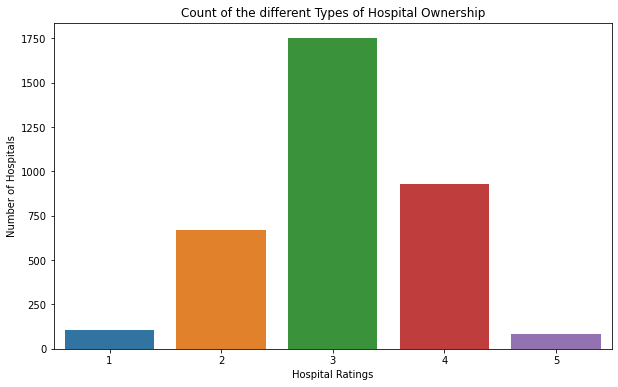

In [144]:
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)
ax  = sns.barplot(x = 'Ratings', y = 'Hospitals',data = Hosp_rating)
ax.set_xlabel('Hospital Ratings')
ax.set_ylabel( 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

### From the above barchart, here are majority hospitals with 3-star rating. There are very little hospitals with extreme ratings  with 1 or 5 star ratings.

### Heat Map hospital qualities: total rating of the types of hospitals by various groups.

Text(0.5, 1.0, 'Total rating of the types of hospitals under the ownership of various groups')

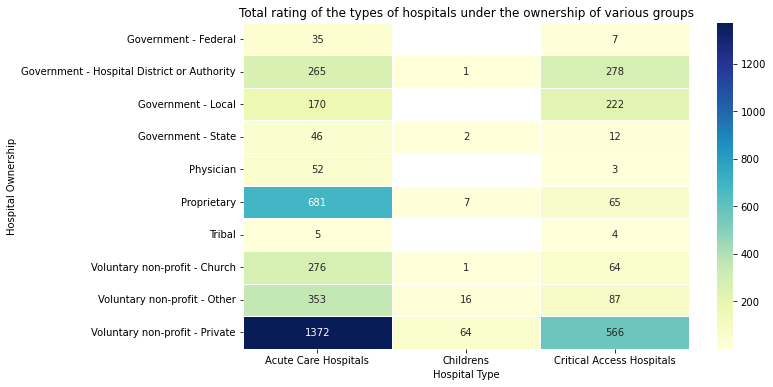

In [145]:
a= pd.pivot_table(df,values=['Hospital overall rating'],index=['Hospital Ownership'],columns=['Hospital Type'],aggfunc='count',margins=False)
plt.figure(figsize=(10,6))
sns.heatmap(a['Hospital overall rating'],linewidths=.5,annot=True,fmt=".0f",vmin=0.01,cmap='YlGnBu')
plt.title('Total rating of the types of hospitals under the ownership of various groups')

Text(0.5, 1.0, 'Total rating of the types of hospitals under the ownership of various groups')

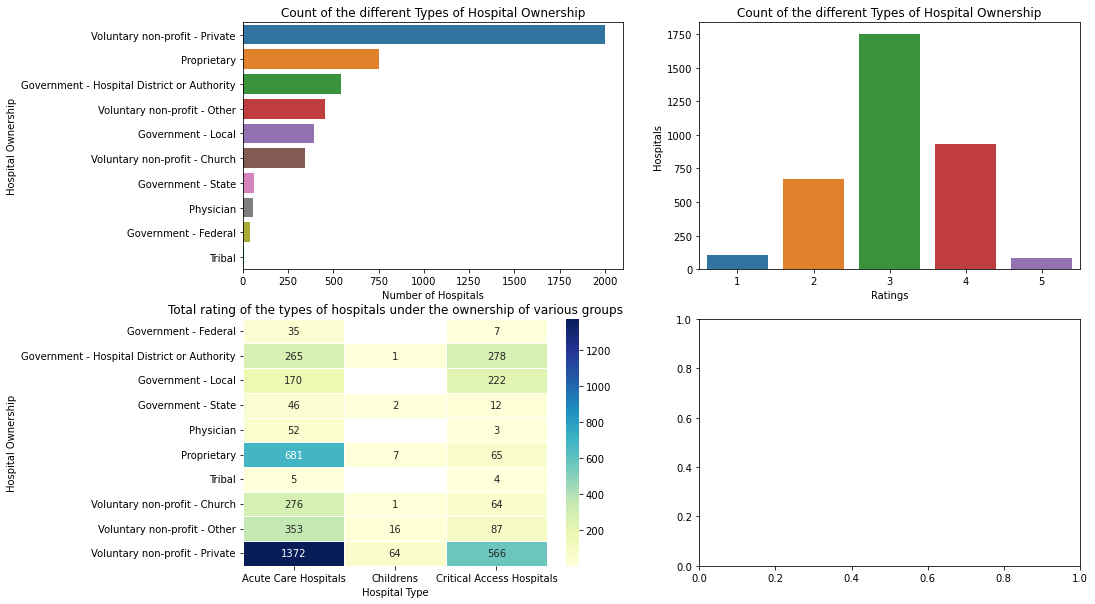

In [146]:
fig, axes = plt.subplots(nrows= 2, ncols =2, figsize = (15,10))

sns.barplot(x= 'Number of Hospitals', y = 'Hospital Ownership', data = hosp_owner, ax =axes[0,0])
axes[0,0].set_title('Count of the different Types of Hospital Ownership')
sns.barplot(x = 'Ratings', y = 'Hospitals',data = Hosp_rating,ax =axes[0,1])
axes[0,1].set_title('Count of the different Types of Hospital Ownership')
sns.heatmap(a['Hospital overall rating'],linewidths=.5,annot=True,fmt=".0f",vmin=0.01,cmap='YlGnBu', ax=axes[1,0])
axes[1,0].set_title('Total rating of the types of hospitals under the ownership of various groups')

# Barplots
### Each tab illustrates the counts of hospitals per category in each of the variables. The barplots are stacked so that the blue portion corresponds to hospitals with above average timely care and orange corresponds to the contrary.

In [147]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['State']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['State'].sort_values().unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [148]:
pivot_state=pd.pivot_table(df, values ='Provider ID',index='State',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')

pivot_state.head()

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
State,,,
AK,NaN,1.0,5.0
AL,37.0,13.0,36.0
AR,25.0,1.0,27.0
AZ,7.0,18.0,27.0
CA,12.0,154.0,82.0


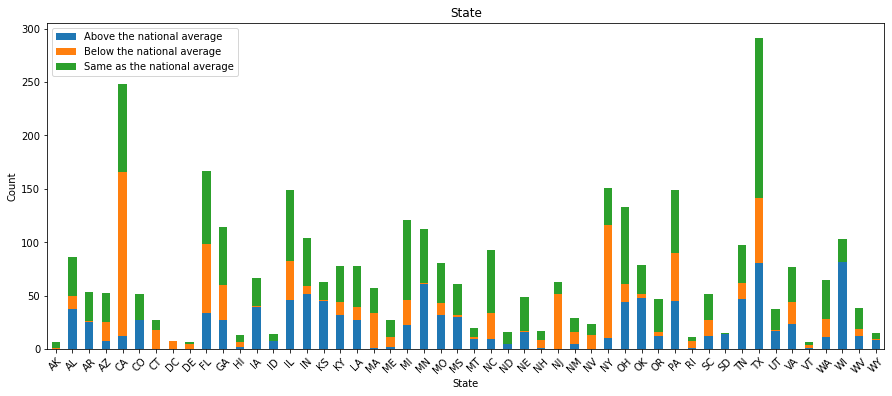

In [149]:
pivot_state.plot(kind ='bar',figsize=(15,6),stacked=True)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("State")
plt.legend(loc='upper left')
plt.xticks(rotation =45)
plt.show()

In [150]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Hospital overall rating']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Hospital overall rating'].sort_values().unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [151]:
pivot_hosp_rate=pd.pivot_table(df, values ='Provider ID',index='Hospital overall rating',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_rate

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Hospital overall rating,,,
1,4,86,17
2,108,332,210
3,524,330,763
4,344,142,371
5,18,10,41


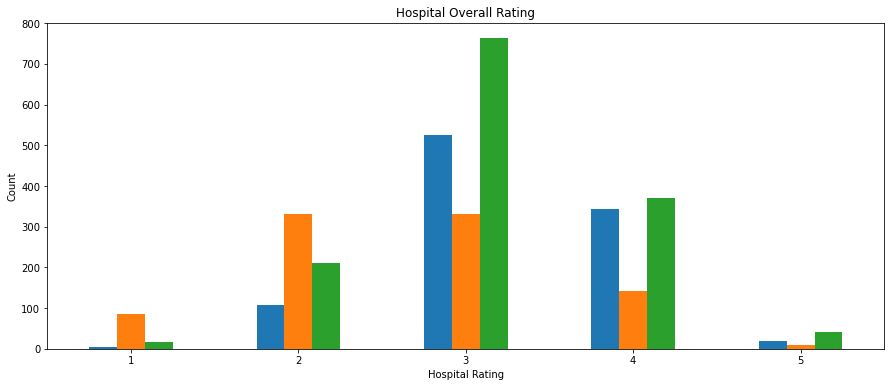

In [152]:
pivot_hosp_rate.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Hospital Rating")
plt.ylabel("Count")
plt.title("Hospital Overall Rating")
#plt.legend(loc='upper right')
plt.xticks(rotation =0)
plt.show()

In [153]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Hospital Type']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Hospital Type'].sort_values().unique()

array(['Acute Care Hospitals', 'Critical Access Hospitals'], dtype=object)

In [154]:
pivot_hosp_type=pd.pivot_table(df, values ='Provider ID',index='Hospital Type',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_type

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Hospital Type,,,
Acute Care Hospitals,803,896,1173
Critical Access Hospitals,195,4,229


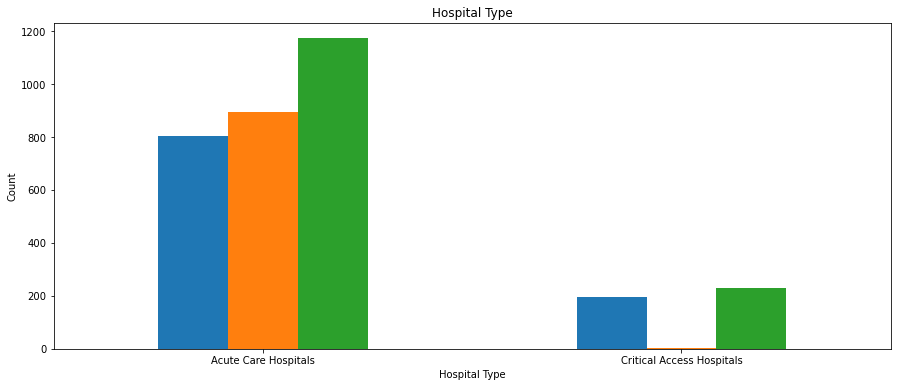

In [155]:
pivot_hosp_type.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Hospital Type")
plt.ylabel("Count")
plt.title("Hospital Type")
#plt.legend(loc='upper right')
plt.xticks(rotation =0)
plt.show()

In [156]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Hospital Ownership']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Hospital Ownership'].sort_values().unique()

array(['Government - Federal',
       'Government - Hospital District or Authority',
       'Government - Local', 'Government - State', 'Physician',
       'Proprietary', 'Tribal', 'Voluntary non-profit - Church',
       'Voluntary non-profit - Other', 'Voluntary non-profit - Private'],
      dtype=object)

In [157]:
pivot_hosp_ownership=pd.pivot_table(df, values ='Provider ID',index='Hospital Ownership',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_ownership

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Hospital Ownership,,,
Government - Federal,4.0,3.0,5.0
Government - Hospital District or Authority,94.0,61.0,157.0
Government - Local,88.0,37.0,89.0
Government - State,5.0,26.0,11.0
Physician,2.0,5.0,8.0
Proprietary,220.0,134.0,230.0
Tribal,NaN,NaN,1.0
Voluntary non-profit - Church,80.0,84.0,128.0
Voluntary non-profit - Other,89.0,103.0,147.0


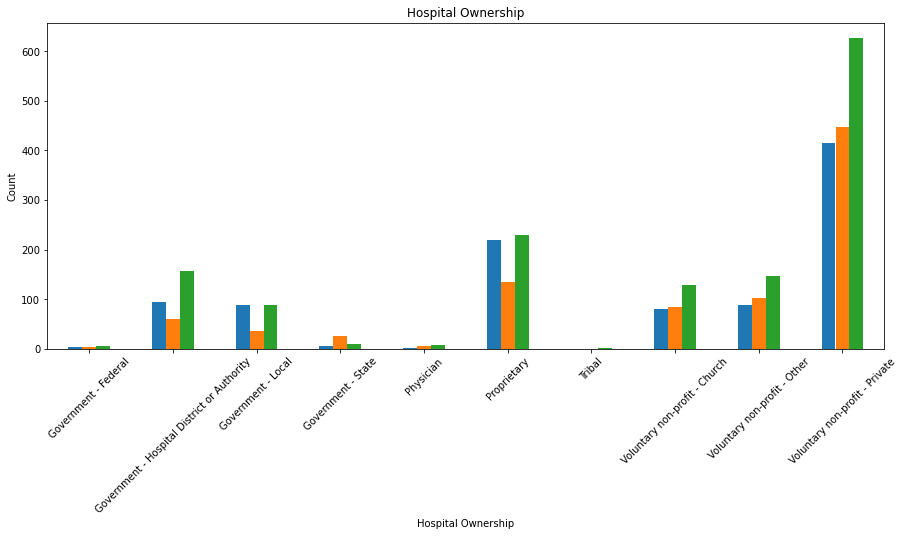

In [158]:
pivot_hosp_ownership.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Hospital Ownership")
plt.ylabel("Count")
plt.title("Hospital Ownership")
#plt.legend(loc='upper left')
plt.xticks(rotation =45)
plt.show()

In [159]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Emergency Services']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Emergency Services'].sort_values().unique()

array([False,  True])

In [160]:
pivot_hosp_ems=pd.pivot_table(df, values ='Provider ID',index='Emergency Services',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_ems

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Emergency Services,,,
False,17,13,28
True,981,887,1374


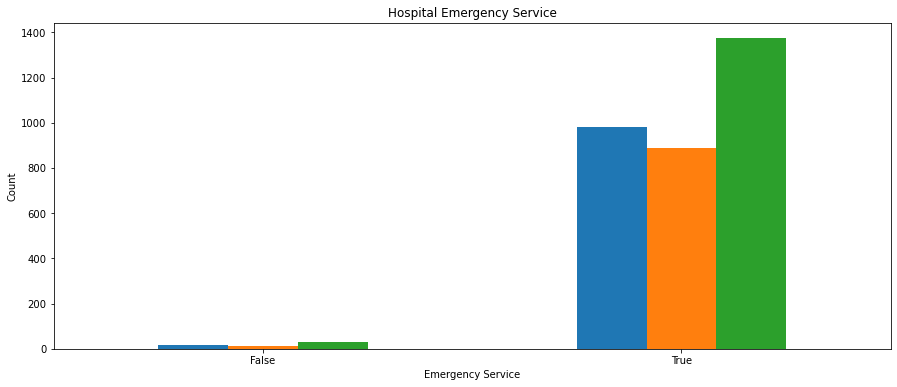

In [161]:
pivot_hosp_ems.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Emergency Service")
plt.ylabel("Count")
plt.title("Hospital Emergency Service")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [162]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Meets criteria for meaningful use of EHRs']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Meets criteria for meaningful use of EHRs'].sort_values().unique()

array([True], dtype=object)

In [163]:
pivot_hosp_ehr=pd.pivot_table(df, values ='Provider ID',index='Meets criteria for meaningful use of EHRs',
                              columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_ehr

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Meets criteria for meaningful use of EHRs,,,
True,998,900,1402


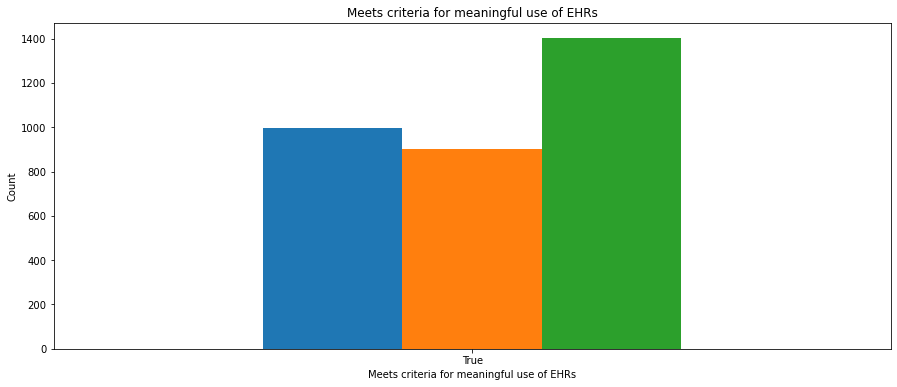

In [164]:
pivot_hosp_ehr.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Meets criteria for meaningful use of EHRs")
plt.ylabel("Count")
plt.title("Meets criteria for meaningful use of EHRs")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [165]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Safety of care national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Safety of care national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [166]:
pivot_hosp_saca=pd.pivot_table(df, values ='Provider ID',index='Safety of care national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_saca

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Safety of care national comparison,,,
Above the national average,153,260,357
Below the national average,102,341,216
Same as the national average,361,283,484


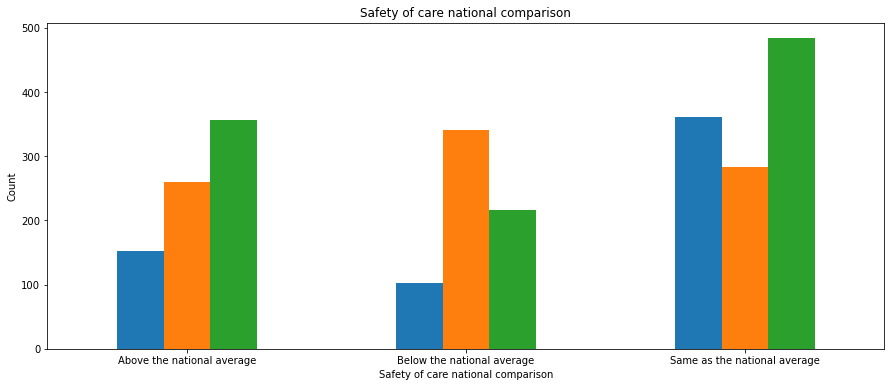

In [167]:
pivot_hosp_saca.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Safety of care national comparison")
plt.ylabel("Count")
plt.title("Safety of care national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [168]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Readmission national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Readmission national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [169]:
pivot_hosp_read=pd.pivot_table(df, values ='Provider ID',index='Readmission national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_read

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Readmission national comparison,,,
Above the national average,197,230,337
Below the national average,121,401,284
Same as the national average,293,248,426


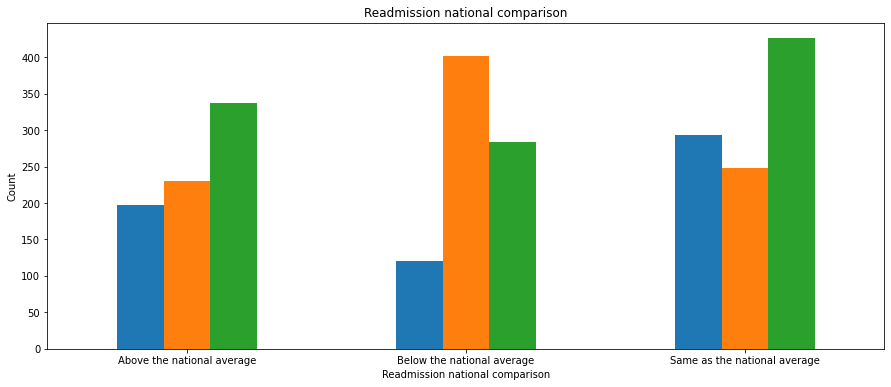

In [170]:
pivot_hosp_read.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Readmission national comparison")
plt.ylabel("Count")
plt.title("Readmission national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [171]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Mortality national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Mortality national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [172]:
pivot_hosp_mort=pd.pivot_table(df, values ='Provider ID',index='Mortality national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_mort

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Mortality national comparison,,,
Above the national average,38,206,146
Below the national average,75,120,143
Same as the national average,492,547,746


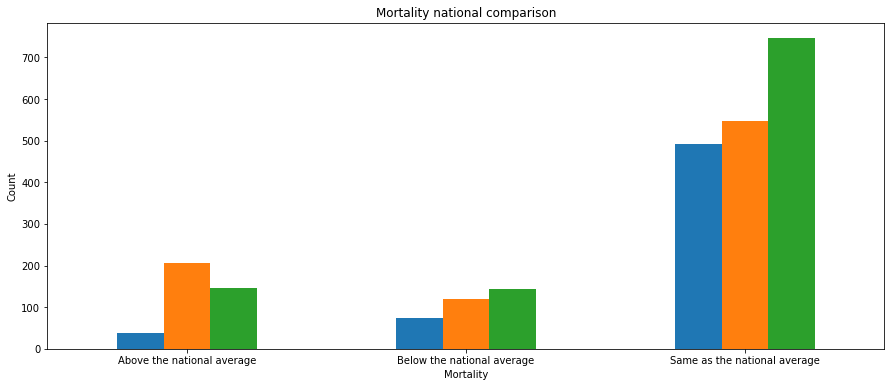

In [173]:
pivot_hosp_mort.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Mortality")
plt.ylabel("Count")
plt.title("Mortality national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [174]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Patient experience national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Patient experience national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [175]:
pivot_hosp_paex=pd.pivot_table(df, values ='Provider ID',index='Patient experience national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_paex

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Patient experience national comparison,,,
Above the national average,240,144,309
Below the national average,139,506,337
Same as the national average,225,222,388


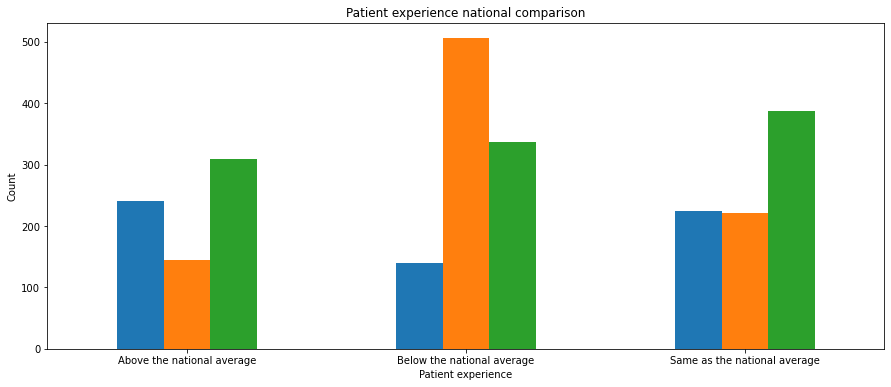

In [176]:
pivot_hosp_paex.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Patient experience")
plt.ylabel("Count")
plt.title("Patient experience national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [177]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Effectiveness of care national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Effectiveness of care national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [178]:
pivot_hosp_efca=pd.pivot_table(df, values ='Provider ID',index='Effectiveness of care national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_efca

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Effectiveness of care national comparison,,,
Above the national average,33,38,52
Below the national average,25,95,45
Same as the national average,546,739,936


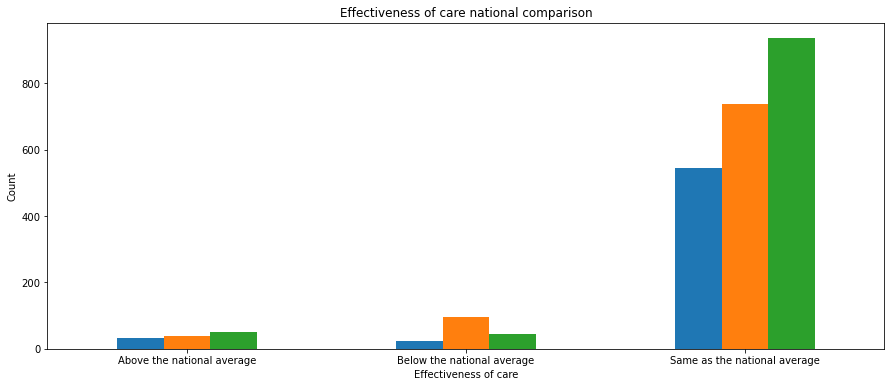

In [179]:
pivot_hosp_efca.plot(kind ='bar',figsize=(15,6),legend=False)
plt.xlabel("Effectiveness of care")
plt.ylabel("Count")
plt.title("Effectiveness of care national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

In [180]:
# remove the" Not Available" rows from the dataset.
df = df.drop(df[df['Efficient use of medical imaging national comparison']=='Not Available'].index)
df = df.drop(df[df['Timeliness of care national comparison']=='Not Available'].index)
df['Efficient use of medical imaging national comparison'].sort_values().unique()

array(['Above the national average', 'Below the national average',
       'Same as the national average'], dtype=object)

In [181]:
pivot_hosp_efmi=pd.pivot_table(df, values ='Provider ID',index='Efficient use of medical imaging national comparison',columns = 'Timeliness of care national comparison',
                        aggfunc = 'count')
pivot_hosp_efmi

Timeliness of care national comparison,Above the national average,Below the national average,Same as the national average
Efficient use of medical imaging national comparison,,,
Above the national average,32,185,139
Below the national average,77,102,127
Same as the national average,428,524,683


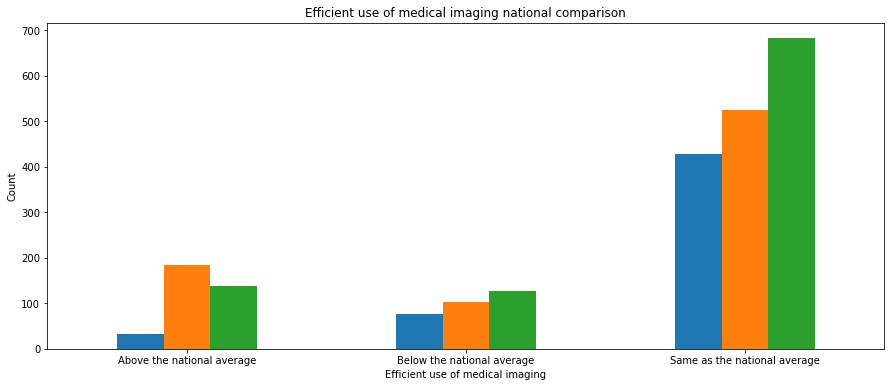

In [182]:
pivot_hosp_efmi.plot(kind ='bar',figsize=(15,6),grid=None, legend=False)
plt.xlabel("Efficient use of medical imaging")
plt.ylabel("Count")
plt.title("Efficient use of medical imaging national comparison")
#plt.legend(loc='upper left')
plt.xticks(rotation =0)
plt.show()

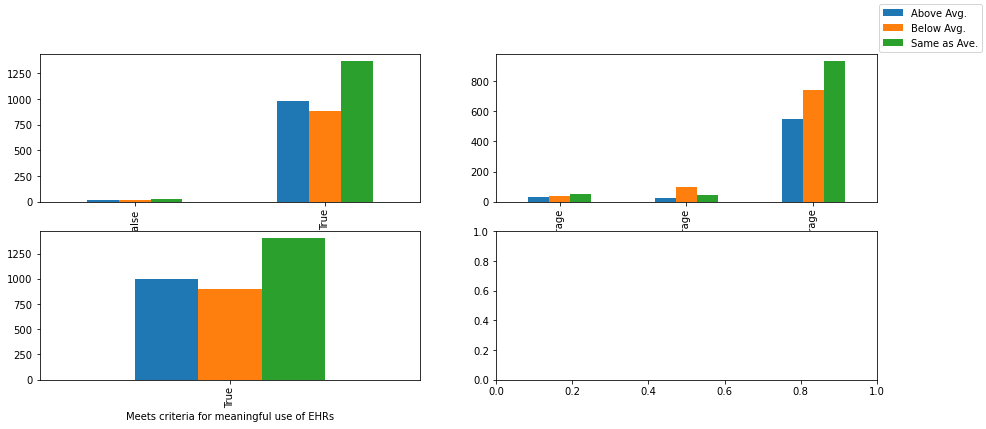

In [183]:
fig,axes = plt.subplots(nrows= 2, ncols =2, figsize = (10,6))
pivot_hosp_ems.plot(kind ='bar',figsize=(15,6),legend=False, ax=axes[0,0])
pivot_hosp_efca.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[0,1])
pivot_hosp_ehr.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[1,0])
plt.figlegend(['Above Avg.','Below Avg.','Same as Ave.'])

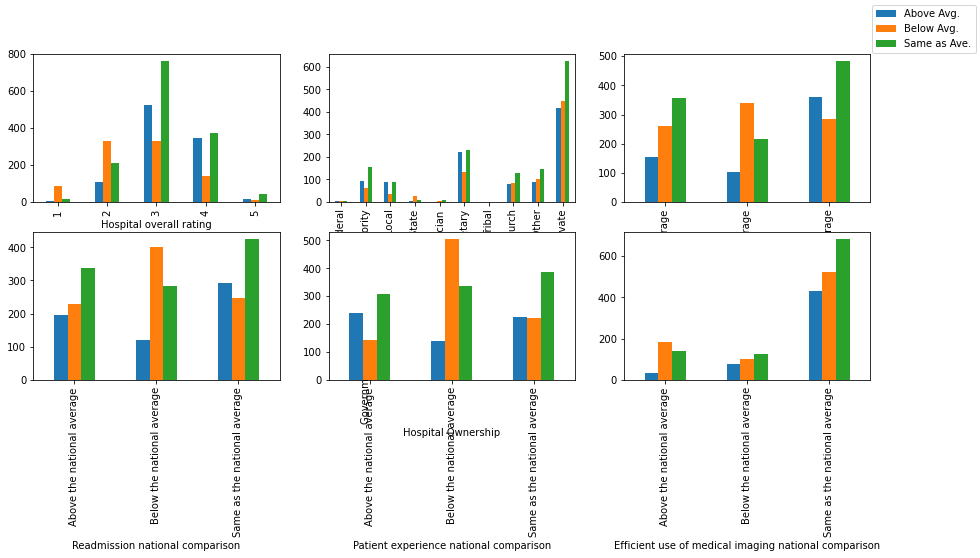

In [185]:
fig,axes = plt.subplots(nrows= 2, ncols =3, figsize = (15,6))
pivot_hosp_rate.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[0,0])
pivot_hosp_ownership.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[0,1])
pivot_hosp_saca.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[0,2])
pivot_hosp_read.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[1,0])
pivot_hosp_paex.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[1,1])
pivot_hosp_efmi.plot(kind ='bar',figsize=(15,6),legend=False,ax=axes[1,2])
plt.figlegend(['Above Avg.','Below Avg.','Same as Ave.'])

In [186]:
# get the working directory or use pwd()
os.getcwd()

'C:\\Users\\dkim174'

In [187]:
df.shape

(2297, 18)

In [188]:
#df.index

In [189]:
df.columns

Index(['Provider ID', 'Hospital Name', 'City', 'State', 'County Name',
       'Hospital Type', 'Hospital Ownership', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison', 'Location'],
      dtype='object')

### The above are 15 columns and their names.

In [190]:
df.dtypes

Provider ID                                              int64
Hospital Name                                           object
City                                                    object
State                                                   object
County Name                                             object
Hospital Type                                           object
Hospital Ownership                                      object
Emergency Services                                        bool
Meets criteria for meaningful use of EHRs               object
Hospital overall rating                                 object
Mortality national comparison                           object
Safety of care national comparison                      object
Readmission national comparison                         object
Patient experience national comparison                  object
Effectiveness of care national comparison               object
Timeliness of care national comparison                 

### The above are the columns types.
### most of columns are objects and one boolen and one integer. From the info coding, I will get details (basic information) about the dataframe.

In [191]:
df.count()

Provider ID                                             2297
Hospital Name                                           2297
City                                                    2297
State                                                   2297
County Name                                             2297
Hospital Type                                           2297
Hospital Ownership                                      2297
Emergency Services                                      2297
Meets criteria for meaningful use of EHRs               2297
Hospital overall rating                                 2297
Mortality national comparison                           2297
Safety of care national comparison                      2297
Readmission national comparison                         2297
Patient experience national comparison                  2297
Effectiveness of care national comparison               2297
Timeliness of care national comparison                  2297
Efficient use of medical

In [192]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [193]:
dup_df = df[['Hospital Name','State','City','Hospital Type']]
dup_df.head()

,Hospital Name,State,City,Hospital Type
0,MARSHALL MEDICAL CENTER SOUTH,AL,BOAZ,Acute Care Hospitals
1,DEKALB REGIONAL MEDICAL CENTER,AL,FORT PAYNE,Acute Care Hospitals
4,CRESTWOOD MEDICAL CENTER,AL,HUNTSVILLE,Acute Care Hospitals
18,CHI-ST VINCENT INFIRMARY,AR,LITTLE ROCK,Acute Care Hospitals
20,OUACHITA COUNTY MEDICAL CENTER,AR,CAMDEN,Acute Care Hospitals


In [194]:
duplicate = dup_df[dup_df.duplicated()].count()
duplicate

Hospital Name    0
State            0
City             0
Hospital Type    0
dtype: int64

In [195]:
# search for any duplicate values with the hospital names.
# sorting by the hospital name.
df.sort_values("Hospital Name", inplace =True)
# making a bool series.
bool_series = df["Hospital Name"].duplicated()
df[bool_series]

,Provider ID,Hospital Name,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
1132,50121,ADVENTIST MEDICAL CENTER,HANFORD,CA,KINGS,Acute Care Hospitals,Voluntary non-profit - Church,True,True,2,Below the national average,Above the national average,Below the national average,Below the national average,Below the national average,Below the national average,Below the national average,"115 MALL DRIVE\nHANFORD, CA\n(36.323877, -119...."
399,520207,AURORA MEDICAL CENTER,GRAFTON,WI,OZAUKEE,Acute Care Hospitals,Voluntary non-profit - Private,True,True,4,Same as the national average,Below the national average,Above the national average,Above the national average,Same as the national average,Above the national average,Same as the national average,"975 PORT WASHINGTON ROAD\nGRAFTON, WI\n"
878,60054,COMMUNITY HOSPITAL,GRAND JUNCTION,CO,MESA,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,Same as the national average,Same as the national average,Above the national average,Below the national average,Same as the national average,Above the national average,Below the national average,"2351 G RD\nGRAND JUNCTION, CO\n(39.106293, -10..."
3116,310041,COMMUNITY MEDICAL CENTER,TOMS RIVER,NJ,OCEAN,Acute Care Hospitals,Voluntary non-profit - Private,True,True,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Below the national average,Above the national average,"99 RT 37 WEST\nTOMS RIVER, NJ\n(39.965083, -74..."
3914,450040,COVENANT MEDICAL CENTER,LUBBOCK,TX,LUBBOCK,Acute Care Hospitals,Voluntary non-profit - Church,True,True,3,Same as the national average,Same as the national average,Above the national average,Above the national average,Below the national average,Same as the national average,Below the national average,"3615 19TH STREET\nLUBBOCK, TX\n(33.577867, -10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,450686,UNIVERSITY MEDICAL CENTER,LUBBOCK,TX,LUBBOCK,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Below the national average,"602 INDIANA AVENUE\nLUBBOCK, TX\n(33.589429, -..."
2729,310012,VALLEY HOSPITAL,RIDGEWOOD,NJ,BERGEN,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"223 N VAN DIEN AVENUE\nRIDGEWOOD, NJ\n(40.9832..."
3089,340010,WAYNE MEMORIAL HOSPITAL,GOLDSBORO,NC,WAYNE,Acute Care Hospitals,Voluntary non-profit - Private,True,True,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,"2700 WAYNE MEMORIAL DR\nGOLDSBORO, NC\n(35.400..."
517,110124,WAYNE MEMORIAL HOSPITAL,JESUP,GA,WAYNE,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Same as the national average,Same as the national average,Below the national average,Above the national average,Same as the national average,Above the national average,Below the national average,"865 SOUTH FIRST STREET\nJESUP, GA\n(31.602952,..."


In [196]:
# check if  there are duplicate values.
df.loc[df.duplicated(keep=False)]

,Provider ID,Hospital Name,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location


In [200]:
# Select and count the Hospital Type using groupby function.
df_type_group = df.groupby('Hospital Type')['Provider ID'].count()
df_type_group

Hospital Type
Acute Care Hospitals         2296
Critical Access Hospitals       1
Name: Provider ID, dtype: int64

In [201]:
df['County Name'].isna().sum()

0

In [202]:
df['Timeliness of care national comparison'].isna().sum()

0

### It seems location information is not provided, and there are NaN in few columns. This requires more investigation on each columns in the dataset, and I might need to clean the dataset.

In [203]:
# df['State'].value_counts()

### The hospitals of Maryland in the dataset is too little to analyze my tasks. Hence, I will use all the hospitals in the dataset.

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297 entries, 2796 to 463
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           2297 non-null   int64 
 1   Hospital Name                                         2297 non-null   object
 2   City                                                  2297 non-null   object
 3   State                                                 2297 non-null   object
 4   County Name                                           2297 non-null   object
 5   Hospital Type                                         2297 non-null   object
 6   Hospital Ownership                                    2297 non-null   object
 7   Emergency Services                                    2297 non-null   bool  
 8   Meets criteria for meaningful use of EHRs             2297 non-null   o

# Observations and Cleaning

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [206]:
df = pd.read_csv (r'C:\Users\dkim174\Documents\Classes\Data205\Dataset\HospInfo.csv')

In [207]:
# I would like to check the provider ID is a unique identifer. I could use the ID as an identifer instead of hospital name. Some hospitals may have the same names. 
nrows = df.shape[0]
num_unique_hosp = df['Provider ID'].nunique()
print("Is Provider ID a unique ID?: {0}".format(nrows == num_unique_hosp))

Is Provider ID a unique ID?: True


In [208]:
# drop columns contains "footnote" which are not relevant to my data analysis and replace "Not available" to "NaN" as true missing value.
df = df.replace('Not Available', np.nan )
cols_to_drop = list(df.filter(regex='footnote'))
df_clean = df[df.columns.drop(cols_to_drop)]
df_clean.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,True,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,True,4,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,True,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,True,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [209]:
df_clean.shape

(4812, 21)

In [210]:
# Check columns in the df_clean dataframe.
df_clean.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison', 'Location'],
      dtype='object')

# Explore Data Analysis

In [211]:
# Use normalize to obtain the percentage of hospital waiting time instead of frequencies.
df_clean['Timeliness of care national comparison'].value_counts(normalize=True)

Timeliness of care national comparison
Same as the national average    0.438240
Above the national average      0.306825
Below the national average      0.254935
Name: proportion, dtype: float64

In [212]:
print((nrows, round(nrows * 0.255)))

(4812, 1227)


##### A little over 25% of hospitals in the US in the Centers for CMS system have below the national average.Out of 4,812 total hospitals,  1,227 hospitals have below average wait times. This is a problem since longer wait times are correlated to the patients' dissatisfaction and overall treatment. It is proven that waiting time is significantly associated with a deterioration in patient outcomes.
##### Reference: https://pubmed.ncbi.nlm.nih.gov/30014544/
##### https://blog.waittime.com/effects-of-longer-waiting-time-in-health-care/#:~:text=The%20health%20care%20patient%20experience%20is%20significantly%20related,perception%20of%20information%20and%20sometimes%20the%20overall%20treatment.

### Let's explore other variables in the dataset to see which features are most correlated with these hospitals. In the end, we could use unsupervised learning and predictive models to confirm these attributes. Once we have discovered these features, we could make recomendations for these hospitals to allocate their resources more effectively that will, hopefully, improving timeliness of care.

## Data Modeling

In [213]:
df_clean.isnull().mean().sort_values(ascending=False)

Safety of care national comparison                      0.450540
Efficient use of medical imaging national comparison    0.422485
Patient experience national comparison                  0.284497
Mortality national comparison                           0.280964
Timeliness of care national comparison                  0.263092
Hospital overall rating                                 0.258728
Effectiveness of care national comparison               0.249792
Readmission national comparison                         0.211347
Meets criteria for meaningful use of EHRs               0.029925
County Name                                             0.003117
Provider ID                                             0.000000
Emergency Services                                      0.000000
Hospital Name                                           0.000000
Hospital Ownership                                      0.000000
Hospital Type                                           0.000000
Phone Number             

### Based on our visualizations, there are variables that have quite a lot of missing data. From the output below, we see that two variables have a little less than half of their values missing: 
### Safety of care 45% and efficient use of medical imaging 42%. Since they're less than half, their values can still be useful for modeling

In [214]:
#store the number of rows before (b) dropping
num_rows_b = df_clean.shape[0]

df_clean = df_clean.loc[df_clean["Timeliness of care national comparison"].notnull(), :]

#check if there is no missnig data in target variable
print("% of missing data in target variable after cleaning: {:.0%}"\
      .format(df_clean["Timeliness of care national comparison"].isnull().mean()))

% of missing data in target variable after cleaning: 0%


In [215]:
#store the number of rows after (a) dropping
num_rows_a = df_clean.shape[0]

#Show the change in number of rows
print("# of rows before dropping NAs: {0}\n# of rows after dropping NAs: {1}"\
      .format(num_rows_b, num_rows_a))

# of rows before dropping NAs: 4812
# of rows after dropping NAs: 3546


In [216]:
#Remove Hospital Name, Address, City, State, Zip Code, County Name, Phone Number, and Location 
#Keep Provider ID for key later on so that we could pull in other information if we want to.
df_clean = df_clean.drop([
    "Hospital Name", "Address", "City", 
    "State", "ZIP Code", "Phone Number",
    "County Name", "Location"
], axis =1)

#See if values that are categorical are truly categorical, bools as truly bool and int as ints
df_clean.dtypes

Provider ID                                              int64
Hospital Type                                           object
Hospital Ownership                                      object
Emergency Services                                        bool
Meets criteria for meaningful use of EHRs               object
Hospital overall rating                                 object
Mortality national comparison                           object
Safety of care national comparison                      object
Readmission national comparison                         object
Patient experience national comparison                  object
Effectiveness of care national comparison               object
Timeliness of care national comparison                  object
Efficient use of medical imaging national comparison    object
dtype: object

In [217]:
#Categorical variables are correctly casted as object type
#Emergency Services is bool but Meets criteria for meaningful use of EHR is not. Let's convert this to bool
df_clean['Meets criteria for meaningful use of EHRs'] = \
df_clean['Meets criteria for meaningful use of EHRs'].astype(bool)

#hospital overall rating should be numerical type (int doesn't accept missing values, so conver to float type)
df_clean['Hospital overall rating'] = df_clean['Hospital overall rating'].astype(float)

df_clean.dtypes

Provider ID                                               int64
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                         bool
Meets criteria for meaningful use of EHRs                  bool
Hospital overall rating                                 float64
Mortality national comparison                            object
Safety of care national comparison                       object
Readmission national comparison                          object
Patient experience national comparison                   object
Effectiveness of care national comparison                object
Timeliness of care national comparison                   object
Efficient use of medical imaging national comparison     object
dtype: object

In [219]:
df_clean.head()

,Provider ID,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10005,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average
1,10012,Acute Care Hospitals,Proprietary,True,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average
2,10032,Acute Care Hospitals,Government - Hospital District or Authority,True,True,4.0,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN
3,10095,Acute Care Hospitals,Government - Local,True,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN
4,10131,Acute Care Hospitals,Proprietary,True,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average


In [220]:
#Create dummy variables for Hospital Type and Hospital Ownership and save into dv 
dv = pd.get_dummies(df_clean[['Hospital Type', 'Hospital Ownership']] )
dv.head()

#drop old columns and concatenate new dummy variables
df_clean = df_clean.drop(['Hospital Type', 'Hospital Ownership'], axis=1)
df_clean = pd.concat([df_clean, dv], axis=1)

#print head to check results (they're appended to the end)
df_clean.head()
#Remember that Hospital Type and Hospital Ownership did NOT have missing data from the original data.

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital Type_Acute Care Hospitals,Hospital Type_Critical Access Hospitals,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,True,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,True,False,False,True,False,False,False,False,False,False,False,False
1,10012,True,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,True,False,False,False,False,False,False,True,False,False,False,False
2,10032,True,True,4.0,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN,True,False,False,True,False,False,False,False,False,False,False,False
3,10095,True,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN,True,False,False,False,True,False,False,False,False,False,False,False
4,10131,True,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,True,False,False,False,False,False,False,True,False,False,False,False


In [221]:
#create list of columns to convert to ordinal
# only modify variables that have "national compmarison" in naming
ordinal_col = list(df_clean.filter(regex="national comparison"))

#Create customized mapper to factorize variables that are ordinal nature
mapper = {
    'Below the national average' : 0,
    'Same as the national average' : 1, 
    'Above the national average' : 2
}
for col in ordinal_col:
    df_clean.loc[:, df_clean.columns == col]= df_clean.loc[:, df_clean.columns == col].replace(mapper)

#print results. 
df_clean.dtypes

Provider ID                                                         int64
Emergency Services                                                   bool
Meets criteria for meaningful use of EHRs                            bool
Hospital overall rating                                           float64
Mortality national comparison                                      object
Safety of care national comparison                                 object
Readmission national comparison                                    object
Patient experience national comparison                             object
Effectiveness of care national comparison                          object
Timeliness of care national comparison                             object
Efficient use of medical imaging national comparison               object
Hospital Type_Acute Care Hospitals                                   bool
Hospital Type_Critical Access Hospitals                              bool
Hospital Ownership_Government - Federa

In [222]:
df_clean.columns

Index(['Provider ID', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'Hospital Type_Acute Care Hospitals',
       'Hospital Type_Critical Access Hospitals',
       'Hospital Ownership_Government - Federal',
       'Hospital Ownership_Government - Hospital District or Authority',
       'Hospital Ownership_Government - Local',
       'Hospital Ownership_Government - State', 'Hospital Ownership_Physician',
       'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
       'Hospital Ownership_Voluntary non-profit - Church',
       'Hospital Ownership_Voluntary non-profit - Other',
       'Hos

In [223]:
#Factorize "Emergency Services" and "Meets criteria for meaningful use of EHRs" into booleans
#true = 1 and False = 0
bool_cols = ['Emergency Services', 'Meets criteria for meaningful use of EHRs',
            'Hospital Type_Acute Care Hospitals',
       'Hospital Type_Critical Access Hospitals',
       'Hospital Ownership_Government - Federal',
       'Hospital Ownership_Government - Hospital District or Authority',
       'Hospital Ownership_Government - Local',
       'Hospital Ownership_Government - State', 'Hospital Ownership_Physician',
       'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
       'Hospital Ownership_Voluntary non-profit - Church',
       'Hospital Ownership_Voluntary non-profit - Other',
       'Hospital Ownership_Voluntary non-profit - Private']
df_clean[bool_cols] = (df_clean[bool_cols] == True).astype(int)

df_clean['Mortality national comparison'] = df_clean['Mortality national comparison'].astype(float)
df_clean['Safety of care national comparison'] = df_clean['Safety of care national comparison'].astype(float)
df_clean['Readmission national comparison'] = df_clean['Readmission national comparison'].astype(float)
df_clean['Patient experience national comparison'] = df_clean['Patient experience national comparison'].astype(float)
df_clean['Effectiveness of care national comparison'] = df_clean['Effectiveness of care national comparison'].astype(float)
df_clean['Timeliness of care national comparison'] = df_clean['Timeliness of care national comparison'].astype(float)
df_clean['Efficient use of medical imaging national comparison'] = df_clean['Efficient use of medical imaging national comparison'].astype(float)
#print head to see results
df_clean.dtypes

Provider ID                                                         int64
Emergency Services                                                  int32
Meets criteria for meaningful use of EHRs                           int32
Hospital overall rating                                           float64
Mortality national comparison                                     float64
Safety of care national comparison                                float64
Readmission national comparison                                   float64
Patient experience national comparison                            float64
Effectiveness of care national comparison                         float64
Timeliness of care national comparison                            float64
Efficient use of medical imaging national comparison              float64
Hospital Type_Acute Care Hospitals                                  int32
Hospital Type_Critical Access Hospitals                             int32
Hospital Ownership_Government - Federa

In [224]:
df_clean.head()

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital Type_Acute Care Hospitals,Hospital Type_Critical Access Hospitals,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,1,1,3.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0
1,10012,1,1,3.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0
2,10032,1,1,4.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,10095,1,1,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0
4,10131,1,1,3.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0


In [225]:
df_clean.shape

(3546, 23)

## Machine Learning

In [229]:
y = df_clean.pop("Timeliness of care national comparison") # Hospital's wait time
X = df_clean

#randomly split into training and testing data. Put aside 20% of the data for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Compare dimensions:
#Remember that after I dropped rows from earlier, there were 2,959 rows
print("Original X: {0}, Original y: {1}".format(X.shape, y.shape))
print("X Train: {0}, y train: {1}".format(X_train.shape, y_train.shape))
print("X Train: {0}, y test: {1}".format(X_test.shape, y_test.shape))

KeyError: 'Timeliness of care national comparison'

In [230]:
#Now remove provider ID after we have split into train/test
X_train_id = X_train.pop("Provider ID")
X_test_id = X_test.pop("Provider ID")

## XGboost to predict the outcomes.

In [231]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#Instantiate XGB classifier model
xgb = XGBClassifier(seed = 123)

# fit model no training data
xgb.fit(X_train, y_train)

#Predict the lables of the test test
preds = xgb.predict(X_test)

# Compute the accuracy: accuracy

accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 53.24%


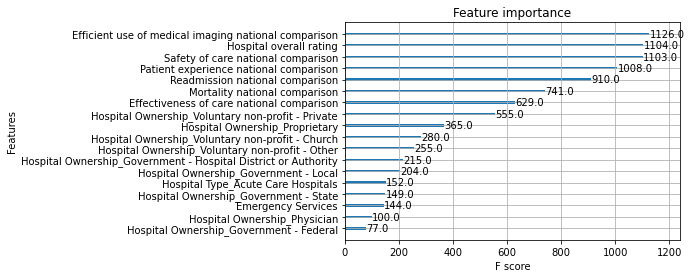

In [232]:
#plot feature importance graph to see which features contribute to predicting the outcomes
plot_importance(xgb)
plt.show()

In [233]:
#subset features there are "fairly importnat" relate to other features
subset = [
    "Hospital overall rating", "Safety of care national comparison",
    "Efficient use of medical imaging national comparison", 
    "Patient experience national comparison", "Mortality national comparison", 
    "Effectiveness of care national comparison", "Readmission national comparison",
    "Hospital Ownership_Proprietary"
]
X_train = X_train[subset]
X_test = X_test[subset]

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 51.41%


# Conclusion

##### I couldn't conclude the prediction of the patient wait time with this dataset. However, the most important features that helped predict hospital's quality of timely care matches what we've seen in the visualization and  exploratory data analysis process.

##### Reference source: https://koalatea.io/python-ordinal-encoding
##### https://data.cms.gov/provider-data/topics/hospitals/about-data#measure-update-frequency
##### https://www.ahrq.gov/talkingquality/measures/setting/hospitals/measurement-sets.html
##### https://www.ahrq.gov/talkingquality/measures/setting/hospitals/examples.html